In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('../fintech-credit-scoring/application_info.csv')
flags = pd.read_csv('../fintech-credit-scoring/default_flg.csv')

df = pd.merge(data, flags, on='id')
df

,id,application_dt,sample_cd,education_cd,gender_cd,age,car_own_flg,car_type_flg,appl_rej_cnt,good_work_flg,Score_bki,out_request_cnt,region_rating,home_address_cd,work_address_cd,income,SNA,first_time_cd,Air_flg,default_flg
0,1,01JAN2014,train,SCH,M,27,Y,Y,0,0,-1.917831,0,40,2,3,32000,1,4,N,0
1,2,01JAN2014,train,GRD,F,26,N,N,0,0,-1.153144,2,60,2,3,50000,2,1,N,0
2,3,01JAN2014,train,SCH,M,35,N,N,0,1,-1.732810,0,40,1,2,20000,4,3,N,0
3,4,01JAN2014,train,GRD,F,35,N,N,0,1,-2.552133,2,20,2,3,80000,1,3,N,0
4,5,01JAN2014,train,UGR,F,24,N,N,0,0,-1.914581,1,50,2,3,27000,1,2,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180811,180812,31AUG2014,validate,GRD,F,60,Y,N,1,0,-2.341941,0,70,2,3,90000,1,3,Y,0
180812,180813,31AUG2014,validate,GRD,F,32,Y,Y,0,0,-1.237068,5,60,2,3,25000,2,3,N,1
180813,180814,31AUG2014,validate,SCH,M,26,Y,Y,0,0,-1.166505,3,60,2,3,35000,1,3,N,0
180814,180815,31AUG2014,validate,SCH,F,28,Y,N,0,0,-1.772115,3,50,2,3,23000,2,1,N,0


In [ ]:
df = df.drop(['id', 'application_dt', 'sample_cd', 'gender_cd'], axis=1)
df

,education_cd,age,car_own_flg,car_type_flg,appl_rej_cnt,good_work_flg,Score_bki,out_request_cnt,region_rating,home_address_cd,work_address_cd,income,SNA,first_time_cd,Air_flg,default_flg
0,SCH,27,Y,Y,0,0,-1.917831,0,40,2,3,32000,1,4,N,0
1,GRD,26,N,N,0,0,-1.153144,2,60,2,3,50000,2,1,N,0
2,SCH,35,N,N,0,1,-1.732810,0,40,1,2,20000,4,3,N,0
3,GRD,35,N,N,0,1,-2.552133,2,20,2,3,80000,1,3,N,0
4,UGR,24,N,N,0,0,-1.914581,1,50,2,3,27000,1,2,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180811,GRD,60,Y,N,1,0,-2.341941,0,70,2,3,90000,1,3,Y,0
180812,GRD,32,Y,Y,0,0,-1.237068,5,60,2,3,25000,2,3,N,1
180813,SCH,26,Y,Y,0,0,-1.166505,3,60,2,3,35000,1,3,N,0
180814,SCH,28,Y,N,0,0,-1.772115,3,50,2,3,23000,2,1,N,0


In [16]:
df.isnull().sum()

education_cd       723
age                  0
car_own_flg          0
car_type_flg         0
appl_rej_cnt         0
good_work_flg        0
Score_bki            0
out_request_cnt      0
region_rating        0
home_address_cd      0
work_address_cd      0
income               0
SNA                  0
first_time_cd        0
Air_flg              0
default_flg          0
dtype: int64

In [17]:
df = df.dropna()

In [18]:
df.isnull().sum()

education_cd       0
age                0
car_own_flg        0
car_type_flg       0
appl_rej_cnt       0
good_work_flg      0
Score_bki          0
out_request_cnt    0
region_rating      0
home_address_cd    0
work_address_cd    0
income             0
SNA                0
first_time_cd      0
Air_flg            0
default_flg        0
dtype: int64

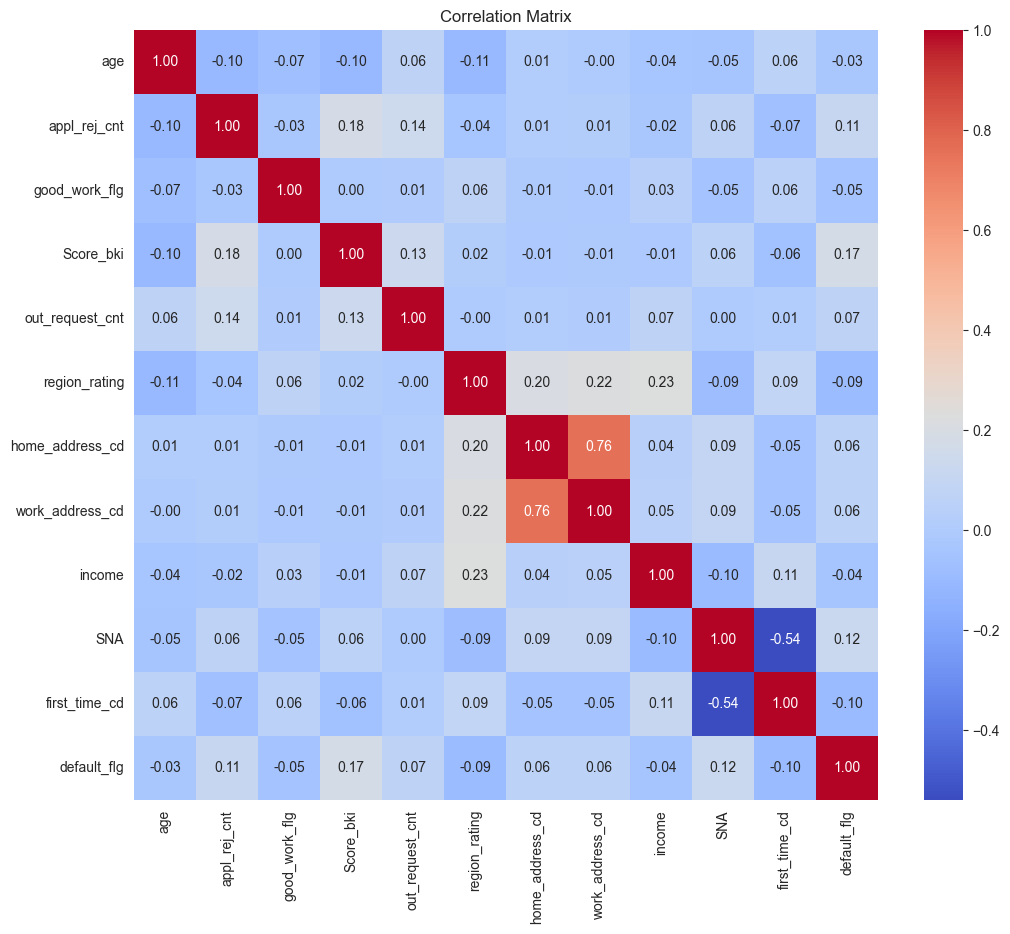

In [19]:
corr = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [20]:
X = df.drop(columns=['default_flg'], axis=1)
y = df['default_flg']

In [21]:
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
numeric_features

Index(['age', 'appl_rej_cnt', 'good_work_flg', 'Score_bki', 'out_request_cnt',
       'region_rating', 'home_address_cd', 'work_address_cd', 'income', 'SNA',
       'first_time_cd'],
      dtype='object')

In [22]:
categorical_features = X.select_dtypes(include=['object', 'category']).columns
categorical_features

Index(['education_cd', 'car_own_flg', 'car_type_flg', 'Air_flg'], dtype='object')

In [23]:
X[categorical_features].nunique()

education_cd    5
car_own_flg     2
car_type_flg    2
Air_flg         2
dtype: int64

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), numeric_features),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), categorical_features)
])

In [25]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

preprocessed_X_train = preprocessor.fit_transform(X_train)
preprocessed_X_test = preprocessor.transform(X_test)

In [26]:
features_names = preprocessor.get_feature_names_out()

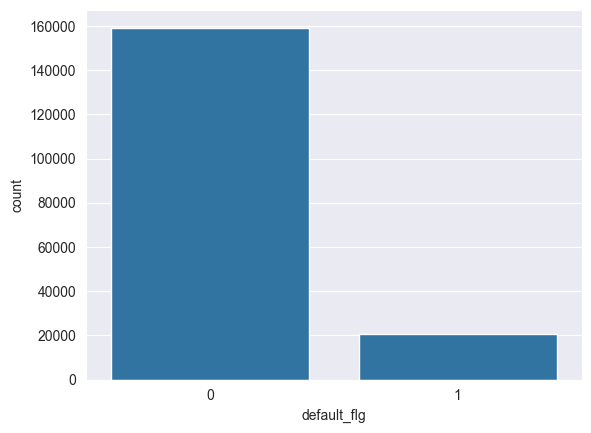

In [27]:
sns.countplot(x=y)
plt.show()

In [28]:
from imblearn import over_sampling

smote = over_sampling.SMOTE(
    random_state=42
)

X_res, y_res = smote.fit_resample(preprocessed_X_train, y_train)

<Axes: >

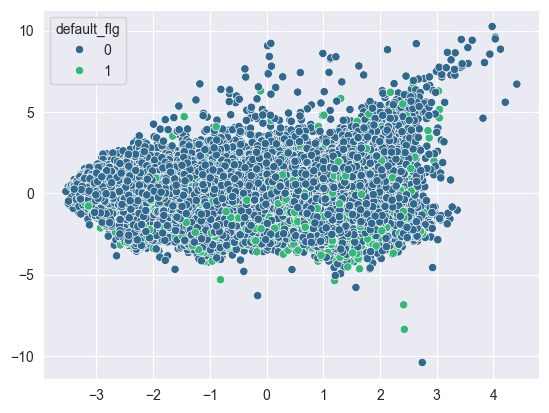

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(preprocessed_X_train)

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_train, palette='viridis')

<Axes: >

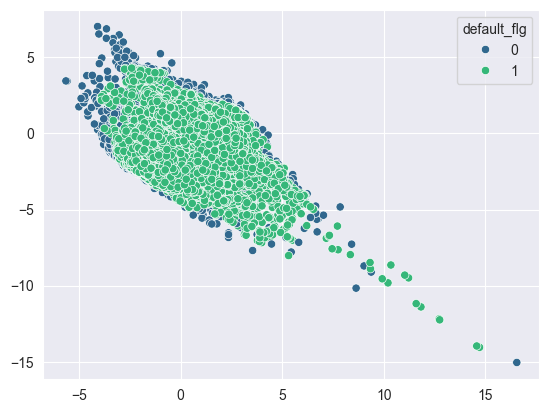

In [30]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_res)

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_res, palette='viridis')

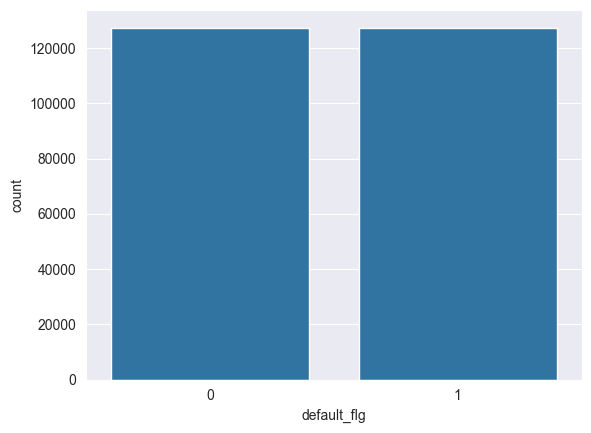

In [31]:
sns.countplot(x=y_res)
plt.show()

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

lr_model = LogisticRegression()

lr_params ={
    'C': np.logspace(-4, 2, 20)
}

lr_search = RandomizedSearchCV(
    lr_model, lr_params, n_iter=10, scoring='f1', random_state=42, cv=5, n_jobs=-1
)

lr_search.fit(X_res, y_res)

,estimator,LogisticRegression()
,param_distributions,{'C': array([1.0000...00000000e+02])}
,n_iter,10
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [8]:
from sklearn.metrics import classification_report

def evaluate_model(model):
    y_pred = model.predict(preprocessed_X_test)
    print(classification_report(y_test,y_pred))

In [33]:
evaluate_model(lr_search.best_estimator_)

              precision    recall  f1-score   support

           0       0.94      0.66      0.77     31868
           1       0.20      0.67      0.31      4151

    accuracy                           0.66     36019
   macro avg       0.57      0.66      0.54     36019
weighted avg       0.85      0.66      0.72     36019



In [34]:
lr_search.best_params_

{'C': np.float64(0.03359818286283781)}

In [70]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()

xgb_params = {
    'max_depth': [7, 9, 10],
    'gamma': [0.1, 0.15, 0.3],
    'alpha': [0.1, 0.15, 0.3],
    'reg_lambda': [1.5, 2, 2.5],
    'learning_rate': [0.02, 0.05, 0.1],
    'n_estimators': [200, 300, 400]
}

In [72]:
xgb_search = RandomizedSearchCV(
    xgb_model, xgb_params, n_iter=10, scoring='f1', cv=4, n_jobs=-1, random_state=42
)

xgb_search.fit(X_res, y_res)

,estimator,"XGBClassifier...ree=None, ...)"
,param_distributions,"{'alpha': [0.1, 0.15, ...], 'gamma': [0.1, 0.15, ...], 'learning_rate': [0.02, 0.05, ...], 'max_depth': [7, 9, ...], ...}"
,n_iter,10
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [74]:
evaluate_model(xgb_search.best_estimator_)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93     31868
           1       0.32      0.06      0.11      4151

    accuracy                           0.88     36019
   macro avg       0.61      0.52      0.52     36019
weighted avg       0.82      0.88      0.84     36019



In [100]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(silent=True)

cat_params = {
    "iterations": [300, 500, 800, 1200, 1500],
    "learning_rate": [0.01, 0.02, 0.03, 0.05],
    "depth": [4, 5, 6, 7, 8, 10],
    "l2_leaf_reg": [1, 3, 5, 7, 9, 15, 20],
    "bagging_temperature": [0, 1, 5, 10],
    "random_strength": [0.5, 1, 2, 3, 5],
    "border_count": [32, 64, 128, 254],
}

In [101]:
cat_search = RandomizedSearchCV(
    estimator=cat_model,
    param_distributions=cat_params,
    n_iter=5,
    scoring='f1',
    cv=4,
    random_state=42,
    n_jobs=-1,
)

cat_search.fit(X_res, y_res)

,estimator,<catboost.cor...t 0x16a10bc90>
,param_distributions,"{'bagging_temperature': [0, 1, ...], 'border_count': [32, 64, ...], 'depth': [4, 5, ...], 'iterations': [300, 500, ...], ...}"
,n_iter,5
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [102]:
evaluate_model(cat_search.best_estimator_)

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     31868
           1       0.43      0.03      0.06      4151

    accuracy                           0.88     36019
   macro avg       0.66      0.51      0.50     36019
weighted avg       0.83      0.88      0.84     36019



In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# базовая модель
rf_model = RandomForestClassifier(random_state=42)

# пространство поиска
rf_params = {
    "n_estimators": [100, 200, 300, 500, 800],
    "max_depth": [None, 5, 8, 10, 12, 15, 20],
    "min_samples_split": [2, 5, 10, 20, 50],
    "min_samples_leaf": [1, 2, 5, 10, 20],
    "max_features": ["sqrt", "log2", None],
    "bootstrap": [True, False],
    "class_weight": ["balanced", "balanced_subsample"]  # ВАЖНО для дисбаланса
}



In [90]:
# RandomizedSearchCV
rf_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_params,
    n_iter=5,
    scoring="f1",
    cv=4,
    random_state=42,
    n_jobs=-1,
)

# обучение
rf_search.fit(X_res, y_res)

rf_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 20,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': None,
 'class_weight': 'balanced',
 'bootstrap': False}

In [91]:
evaluate_model(rf_search.best_estimator_)

              precision    recall  f1-score   support

           0       0.89      0.96      0.92     31868
           1       0.28      0.13      0.18      4151

    accuracy                           0.86     36019
   macro avg       0.59      0.54      0.55     36019
weighted avg       0.82      0.86      0.84     36019



In [ ]:
import joblib

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", model),
])

pipeline.fit(X_train, y_train)

joblib.dump(pipeline, "pipeline.pkl")


# Model saving

In [38]:
# === IMPORTS ===
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

import joblib


# === LOAD DATA ===
# df = pd.read_csv("application_info.csv")  # если нужно — раскомментируй
# предполагаем, что df уже в памяти


# === FEATURES ===
numeric_features = [
    "age",
    "appl_rej_cnt",
    "Score_bki",
    "out_request_cnt",
    "region_rating",
    "income",
    "SNA",
    "first_time_cd",
]

categorical_features = [
    "education_cd",
    "car_own_flg",
    "car_type_flg",
    "good_work_flg",
    "home_address_cd",
    "work_address_cd",
    "Air_flg",
]


# === PREPROCESSOR ===
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore")),
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)


# === MODEL ===
log_reg = LogisticRegression(
    C=0.03359818286283781,
    tol=0.0001,
    max_iter=100,
    solver="lbfgs"
)


# === PIPELINE ===
pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("model", log_reg)
])


# === TRAIN/TEST SPLIT ===
X = df.drop(columns=["default_flg"])
y = df["default_flg"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# === TRAIN MODEL ===
pipeline.fit(X_train, y_train)


# === EVALUATE ===
y_pred = pipeline.predict(X_test)
print("\n=== Classification Report ===\n")
print(classification_report(y_test, y_pred))


# === SAVE PIPELINE ===
joblib.dump(pipeline, "credit_scoring_pipeline.pkl")
print("\nPipeline saved as credit_scoring_pipeline.pkl")



=== Classification Report ===

              precision    recall  f1-score   support

           0       0.94      0.66      0.77     31868
           1       0.20      0.66      0.31      4151

    accuracy                           0.66     36019
   macro avg       0.57      0.66      0.54     36019
weighted avg       0.85      0.66      0.72     36019


Pipeline saved as credit_scoring_pipeline.pkl


In [36]:
import joblib
joblib.dump(pipeline, "models/credit_scoring_model.pkl")

['models/credit_scoring_model.pkl']

In [39]:
print("NUMERIC:", numeric_features)
print("CATEGORICAL:", categorical_features)


NUMERIC: ['age', 'appl_rej_cnt', 'Score_bki', 'out_request_cnt', 'region_rating', 'income', 'SNA', 'first_time_cd']
CATEGORICAL: ['education_cd', 'car_own_flg', 'car_type_flg', 'good_work_flg', 'home_address_cd', 'work_address_cd', 'Air_flg']
